# Tarea 03 Programación en SIG

### Estudiantes: David Young y Alexandra Salazar

Registros de presencia de felinos de Costa Rica, agrupados por la Infraestructura Mundial de Información en Biodiversidad (GBIF). y Áreas silvestres protegidas (ASP) de Costa Rica, publicadas por el Sistema Nacional de Áreas de Conservación (Sinac) en el Sistema Nacional de Información Territorial (SNIT).


In [1]:
# Carga de pandas
import pandas as pd

#Carga de geopandas
import geopandas as gpd

# Obtener versión de geopandas
gpd.__version__

'0.11.1'

In [2]:
# Carga de datos
felinos_cr = pd.read_csv("datos/felinos.csv", 
                                   sep="\t", 
                                       encoding="iso-8859-1") # para leer tildes y otros caracteres
felinos_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            190 non-null    int64  
 1   datasetKey                        190 non-null    object 
 2   occurrenceID                      187 non-null    object 
 3   kingdom                           190 non-null    object 
 4   phylum                            190 non-null    object 
 5   class                             190 non-null    object 
 6   order                             190 non-null    object 
 7   family                            190 non-null    object 
 8   genus                             190 non-null    object 
 9   species                           190 non-null    object 
 10  infraspecificEpithet              20 non-null     object 
 11  taxonRank                         190 non-null    object 
 12  scientif

In [3]:
# Reducción de columnas
felinos_cr = felinos_cr[["species", "stateProvince", "locality", "eventDate"]]

# Eliminación de fila con valores nulos
felinos_cr = felinos_cr.dropna(how='all')




# Cambio de nombre de columnas
felinos_cr = felinos_cr.rename(columns={"species": "Especies",
                                        "stateProvince": "Provincia",
                                        "locality": "Localidad",
                                        "eventDate": "Fecha"})



'''#Cambio del tipo de datos del campo de fecha
felinos_cr.insert(4, "Hora", felinos_cr["Fecha"], allow_duplicates=True)

# Cambio del tipo de datos del campo de fecha
felinos_cr["Fecha"] = pd.to_datetime(felinos_cr["Fecha"], format="%d/%m/%Y")'''

felinos_cr


,Especies,Provincia,Localidad,Fecha
0,Puma concolor,Puntarenas,NaN,2022-04-22T14:30:01
1,Panthera onca,LimÃ³n,NaN,2022-10-09T18:40:00
2,Panthera onca,Guanacaste,NaN,2022-09-28T05:25:00
3,Leopardus tigrinus,Guanacaste,NaN,2018-02-19T12:32:00
4,Puma yagouaroundi,Puntarenas,NaN,2022-01-23T15:05:00
...,...,...,...,...
185,Puma concolor,NaN,"Cordillera de Talamanca, ChirripÃ³-Massiv (Sab...",NaN
186,Leopardus tigrinus,San JosÃ© Province,Ca. 4 km SW Cerro Chirripo,1967-05-15T00:00:00
187,Leopardus tigrinus,San JosÃ© Province,La Piedra,1967-02-01T00:00:00
188,Leopardus pardalis,Puntarenas Province,14 km NE Potrero Grande,1965-06-28T00:00:00


<AxesSubplot:>

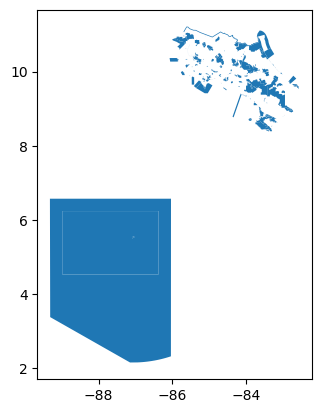

In [4]:
areasp = gpd.read_file("datos/AreasProt.shp")
areasp.plot()